In [ ]:
def cepstrum_implement(x):
    

In [1]:
import numpy as np
p = np.poly1d([1,2,3])
print(p)

   2
1 x + 2 x + 3


In [2]:
p.r

array([-1.+1.41421356j, -1.-1.41421356j])

In [65]:
L = 200 
c1 = 0
c2 = 50
seq = np.array([1,3,2,3,1])
x = np.zeros(L)
x[c1:c1+len(seq)] = x[c1:c1+len(seq)]+seq*20
x[c2:c2+len(seq)] = x[c2:c2+len(seq)]+seq*10
p = np.poly1d(x)
roots = p.r

In [72]:
N = 300
n_positive = np.arange(1,N+1).astype(np.float64)
n_negative = np.arange(-N,0).astype(np.float64)

cep_positive = np.arange(N+1,N+1+N)
cep_negative = np.arange(0,N)
cep = np.zeros(2*N+1).astype(np.complex128)

In [73]:
minimum = 1e-6
A = x[x>minimum][0]
for value in roots:
    if abs(value) > minimum:
        if abs(value) < 1+minimum:
            cep[cep_positive] = cep[cep_positive]-np.power(value, n_positive)/n_positive
        else:
            cep[cep_negative] = cep[cep_negative]+np.power(1/value, -n_negative)/n_negative
            A = A*abs(value)
cep[N] = np.log(A)

<IPython.core.display.Javascript object>


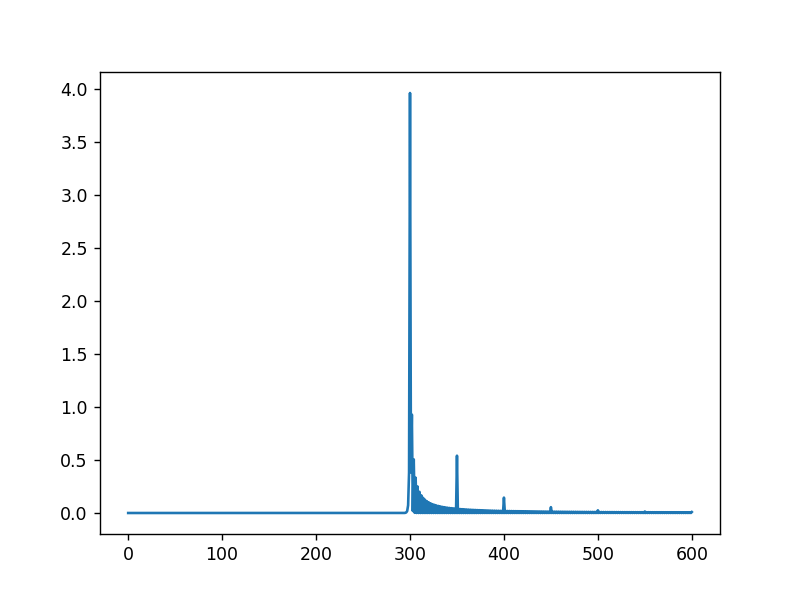

In [74]:
import matplotlib.pyplot as plt 
%matplotlib notebook
plt.plot(abs(cep))